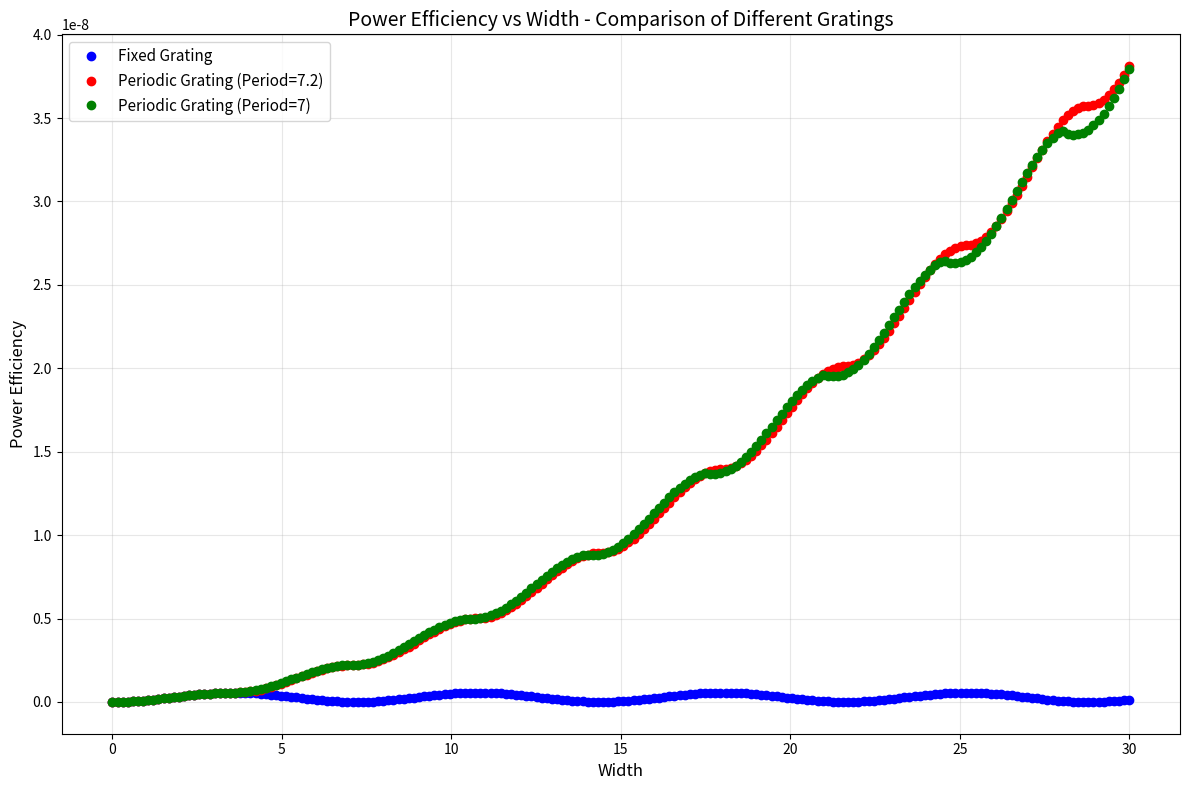

In [ ]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from syuron import shg, mgoslt, pp

# 定数
kappa = 1.031E-05
wavelength = 1.031

# 統一されたスケール
width_values = jnp.linspace(0, 30, 1000)  # 統一されたスケール


def eff_numerical_fixed(width_values):
    """固定グレーティング"""
    fixed_grating = pp.fixed(1, width_values, kappa)
    eff_tensor = mgoslt.analyze(shg.Params(
        grating_dim=fixed_grating,
        T_dim=70,
        wavelength_dim=wavelength,
        fund_power_dim=1,
        sh_power_dim=0,
    ))
    power_tensor = jnp.abs(eff_tensor[:, 0, :, 0, 0])**2
    return jnp.squeeze(power_tensor)


def eff_numerical_periodic_7_2(width_values):
    """周期7.2の周期グレーティング"""
    periodical_grating = pp.periodical_length_limited(width_values, 7.2, kappa)
    eff_tensor = mgoslt.analyze(shg.Params(
        grating_dim=periodical_grating,
        T_dim=70,
        wavelength_dim=wavelength,
        fund_power_dim=1,
        sh_power_dim=0,
    ))
    power_tensor = jnp.abs(eff_tensor[:, 0, :, 0, 0])**2
    return jnp.squeeze(power_tensor)


def eff_numerical_periodic_7(width_values):
    """周期7の周期グレーティング"""
    periodical_grating = pp.periodical_length_limited(width_values, 7, kappa)
    eff_tensor = mgoslt.analyze(shg.Params(
        grating_dim=periodical_grating,
        T_dim=70,
        wavelength_dim=wavelength,
        fund_power_dim=1,
        sh_power_dim=0,
    ))
    power_tensor = jnp.abs(eff_tensor[:, 0, :, 0, 0])**2
    return jnp.squeeze(power_tensor)


# 各ケースの計算
power_fixed = eff_numerical_fixed(width_values)
power_periodic_7_2 = eff_numerical_periodic_7_2(width_values)
power_periodic_7 = eff_numerical_periodic_7(width_values)

# グラフの作成
plt.figure(figsize=(12, 8))
plt.plot(width_values, power_fixed, linewidth=2,
         label='Fixed Grating', color='blue')
plt.plot(width_values, power_periodic_7_2, linewidth=2,
         label='Periodic Grating (Period=7.2)', color='red')
plt.plot(width_values, power_periodic_7, linewidth=2,
         label='Periodic Grating (Period=7)', color='green')

plt.xlabel('Width', fontsize=12)
plt.ylabel('Power Efficiency', fontsize=12)
plt.title('Power Efficiency vs Width - Comparison of Different Gratings', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()